In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = 20, 10
plt.rcParams['axes.unicode_minus'] = False
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
import re

In [2]:
df=pd.read_csv("토픽4.csv")
df["score"]=(df['별점']>3.0)
df=df.replace(True,1)
df=df.replace(False,0)
print(df['score'].sum())
df

4261


,Unnamed: 0,별점,리뷰 내용,score
0,3,5,It was nice to be able to see the beautiful n...,1
1,4,5,Got there at dusk By the time we got into the ...,1
2,5,4,Its been a long time since I visited with my ...,1
3,8,4,cool weather many trees convenient for walking...,1
4,10,5,Go up on the cable car and eat pork cutlet go...,1
...,...,...,...,...
5037,15455,4,Cheonggyecheon An artificial river with a tot...,1
5038,15456,5,Where can you relax Is this the best city in ...,1
5039,15459,4,I walked through the New Year Seoul City Hall...,1
5040,15463,5,Excelente experiencia,1


In [3]:
def text_clearing(text):
    eng=re.compile('[^ a-z A-Z 0-9]+')
    #지정한 정규식에 해당하지 않은 것은 길이가 0인 문자열로 반환한다.
    result=eng.sub('',text)
    return result

In [4]:
df["리뷰 내용"]=df["리뷰 내용"].apply(lambda x:text_clearing(x))
df

,Unnamed: 0,별점,리뷰 내용,score
0,3,5,It was nice to be able to see the beautiful n...,1
1,4,5,Got there at dusk By the time we got into the ...,1
2,5,4,Its been a long time since I visited with my ...,1
3,8,4,cool weather many trees convenient for walking...,1
4,10,5,Go up on the cable car and eat pork cutlet go...,1
...,...,...,...,...
5037,15455,4,Cheonggyecheon An artificial river with a tot...,1
5038,15456,5,Where can you relax Is this the best city in ...,1
5039,15459,4,I walked through the New Year Seoul City Hall...,1
5040,15463,5,Excelente experiencia,1


In [5]:
import nltk
from nltk.corpus import stopwords
from nltk.corpus.reader.wordlist import WordListCorpusReader

stop_words =nltk.corpus.stopwords.words('english')
#add_stop_words  = ["'", ",", "'s", ":", ".", "?", "!","(",")","n't","korea","korean","good","like","awesome","perfect","nice","also","well","seoul","beautiful","wonderful","view","views","city","place","visit","just","lotte","world","went","lotte","tower","street","lot","lots","ddp","insadong","places","bookstore","bookstores","kyobo","lotte","aquarium","feel","animals","park","animals","coex","mall","great","pretty","best","go","see","really","many"]
add_stop_words  = ["'", ",", "'s", ":", ".", "?", "!","(",")","n't","korea","korean","good","like","awesome","perfect","nice","also","well","seoul","beautiful","wonderful","view","views","city","place","visit","just","lotte","world","went","lotte","tower","street","lot","lots","ddp","insadong","places","bookstore","bookstores","kyobo","lotte","aquarium","feel","animals","park","animals","coex","mall","great","pretty","best","go","see","really","many","must","fun","absolutely","attractive","enjoy","specially","without","although","two","able","better","bad","get","interesting"]
for word in add_stop_words:
    stop_words.append(word)
    
def get_pos (x) :
    token=nltk.word_tokenize(x)
    pos = nltk.pos_tag(token)
    
    result = []
    
    for a1 in pos :
        if a1[0] not in stop_words:
            result.append(f'{a1[0]}/{a1[1]}')
    
    return result

In [6]:
index_vectorizer=CountVectorizer(tokenizer=lambda x:get_pos(x))
X=index_vectorizer.fit_transform(df["리뷰 내용"].tolist())
X


<5042x12455 sparse matrix of type '<class 'numpy.int64'>'
	with 101417 stored elements in Compressed Sparse Row format>

In [7]:
index_vectorizer.vocabulary_

{'night/NN': 7340,
 'got/VBD': 4795,
 'dusk/NN': 3587,
 'time/NN': 11040,
 'top/JJ': 11143,
 'dark/VBN': 3001,
 'would/MD': 12291,
 'earlier/JJR': 3607,
 'foothills/NNS': 4447,
 'etc/FW': 3874,
 'buses/NNS': 1863,
 'wouldnt/VBP': 12296,
 'allow/IN': 809,
 'stunning/JJ': 10495,
 'long/JJ': 6425,
 'since/IN': 9783,
 'visited/VBN': 11781,
 'mother/NN': 6989,
 'children/NNS': 2260,
 'even/RB': 3898,
 'weekend/NN': 12033,
 'visitors/NNS': 11793,
 'kosiguk/VBN': 6034,
 'cool/NN': 2717,
 'weather/RB': 12007,
 'trees/NNS': 11332,
 'convenient/VBP': 2707,
 'walking/NN': 11885,
 'morning/NN': 6978,
 'exercise/NN': 3969,
 'cafe/NN': 1933,
 'spacious/JJ': 10095,
 'outdoor/JJ': 7725,
 'space/NN': 10089,
 'cable/NN': 1924,
 'car/NN': 2007,
 'eat/NN': 3638,
 'pork/NN': 8334,
 'cutlet/NN': 2961,
 'date/NN': 3005,
 'riding/VBG': 9104,
 'doubledecker/NN': 3453,
 'bus/NN': 1851,
 'feels/VBZ': 4230,
 'different/JJ': 3250,
 'arrive/VB': 1078,
 'look/NN': 6439,
 'around/IN': 1061,
 'ride/VB': 9093,
 'quite/

In [8]:
print(df["리뷰 내용"][0])
print(df["별점"][0])
print(X[0])

 It was nice to be able to see the beautiful night view of Seoul 
5
  (0, 7340)	1


In [9]:
y=df["score"]

In [10]:
y

0       1
1       1
2       1
3       1
4       1
       ..
5037    1
5038    1
5039    1
5040    1
5041    0
Name: score, Length: 5042, dtype: int64

In [11]:
df

,Unnamed: 0,별점,리뷰 내용,score
0,3,5,It was nice to be able to see the beautiful n...,1
1,4,5,Got there at dusk By the time we got into the ...,1
2,5,4,Its been a long time since I visited with my ...,1
3,8,4,cool weather many trees convenient for walking...,1
4,10,5,Go up on the cable car and eat pork cutlet go...,1
...,...,...,...,...
5037,15455,4,Cheonggyecheon An artificial river with a tot...,1
5038,15456,5,Where can you relax Is this the best city in ...,1
5039,15459,4,I walked through the New Year Seoul City Hall...,1
5040,15463,5,Excelente experiencia,1


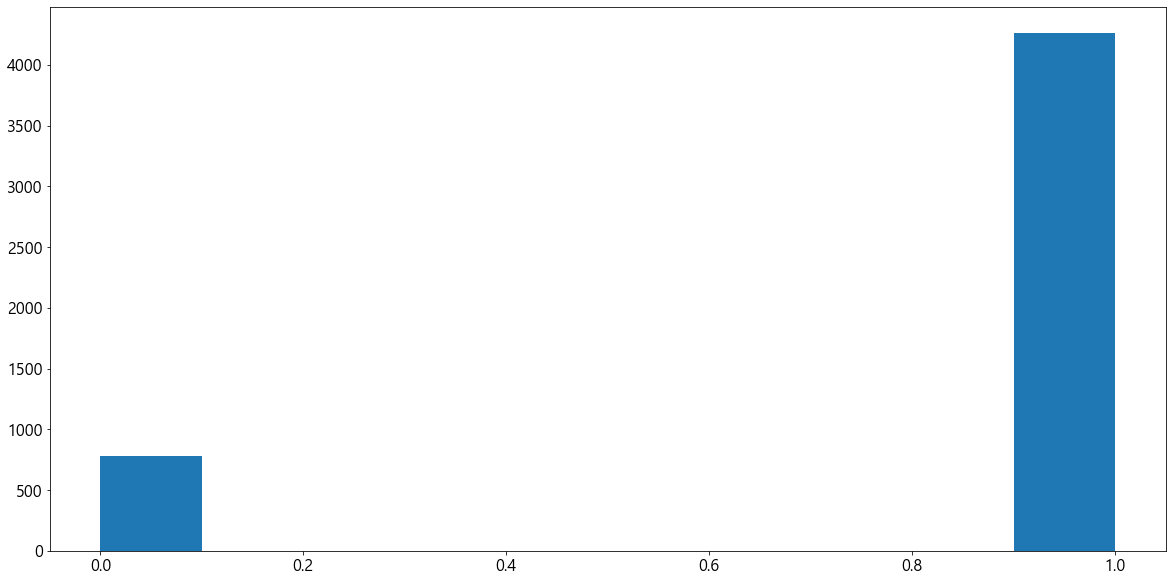

In [12]:
import matplotlib.pyplot as plt
plt.hist(y)
plt.show()

In [13]:
from sklearn.feature_extraction.text import TfidfTransformer
# TFidf 변환 모델 생성
tfidf_transformer = TfidfTransformer()
# 형태소 벡터 변환하기
X = tfidf_transformer.fit_transform(X)
for i in range(10):
    print(X[i])
    print("*"*20)

  (0, 7340)	1.0
********************
  (0, 12296)	0.2724649965497315
  (0, 12291)	0.1461336958848735
  (0, 11143)	0.14513544348688737
  (0, 11040)	0.21584342482660998
  (0, 10495)	0.258425705927687
  (0, 4795)	0.3361853629240343
  (0, 4447)	0.3516222520789158
  (0, 3874)	0.28734724432696634
  (0, 3607)	0.31626878272624565
  (0, 3587)	0.25554698112298607
  (0, 3001)	0.3303080733482901
  (0, 1863)	0.22950416752840766
  (0, 809)	0.3516222520789158
********************
  (0, 12033)	0.28169131255283364
  (0, 11793)	0.30945776901109323
  (0, 11781)	0.3077471420328387
  (0, 11040)	0.15042354601565303
  (0, 9783)	0.25739703455887913
  (0, 7340)	0.1518497362761097
  (0, 6989)	0.42007887286647244
  (0, 6425)	0.2252580844508364
  (0, 6034)	0.513679153602129
  (0, 3898)	0.2143156774514395
  (0, 2260)	0.2850154815316374
********************
  (0, 12007)	0.4008964086992002
  (0, 11885)	0.2718012616515604
  (0, 11332)	0.23097269545834487
  (0, 10095)	0.29132607274398536
  (0, 10089)	0.250360354365284

In [14]:
print(X.shape)

(5042, 12455)


In [15]:
from sklearn.model_selection import train_test_split

x = X
y = y
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=1)


In [16]:
x_train.shape, y_train.shape

((3529, 12455), (3529,))

In [17]:
x_test.shape, y_test.shape

((1513, 12455), (1513,))

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# fit in training set
lr = LogisticRegression(random_state = 0)
lr.fit(x_train, y_train)

# predict in test set
y_pred = lr.predict(x_test)


In [19]:

print('accuracy: %.2f' % accuracy_score(y_test, y_pred))
print('precision: %.2f' % precision_score(y_test, y_pred))
print('recall: %.2f' % recall_score(y_test, y_pred))
print('F1: %.2f' % f1_score(y_test, y_pred))

accuracy: 0.85
precision: 0.85
recall: 1.00
F1: 0.92


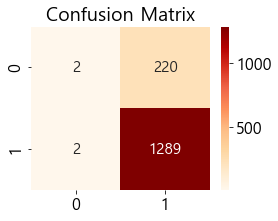

In [20]:
from sklearn.metrics import confusion_matrix

confu = confusion_matrix(y_true = y_test, y_pred = y_pred)

plt.figure(figsize=(4, 3))
sns.heatmap(confu, annot=True, annot_kws={'size':15}, cmap='OrRd', fmt='.10g')
plt.title('Confusion Matrix')
plt.show()

In [21]:
df['score'].value_counts()

1    4261
0     781
Name: score, dtype: int64

In [22]:
positive_random_idx = df[df['score']==1].sample(275, random_state=12).index.tolist()
negative_random_idx = df[df['score']==0].sample(275, random_state=12).index.tolist()

In [23]:
random_idx = positive_random_idx + negative_random_idx
x = X[random_idx]
y = df['score'][random_idx]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1)



In [24]:
x_train.shape, y_train.shape

((412, 12455), (412,))

In [25]:
x_test.shape, y_test.shape

((138, 12455), (138,))

In [26]:
lr2 = LogisticRegression(random_state = 0)
lr2.fit(x_train, y_train)
y_pred = lr2.predict(x_test)

In [27]:
print('accuracy: %.2f' % accuracy_score(y_test, y_pred))
print('precision: %.2f' % precision_score(y_test, y_pred))
print('recall: %.2f' % recall_score(y_test, y_pred))
print('F1: %.2f' % f1_score(y_test, y_pred))


accuracy: 0.64
precision: 0.63
recall: 0.69
F1: 0.66


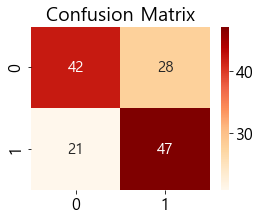

In [28]:
from sklearn.metrics import confusion_matrix

confu = confusion_matrix(y_true = y_test, y_pred = y_pred)

plt.figure(figsize=(4, 3))
sns.heatmap(confu, annot=True, annot_kws={'size':15}, cmap='OrRd', fmt='.10g')
plt.title('Confusion Matrix')
plt.show()


In [29]:
lr2.coef_

array([[0.        , 0.        , 0.08963445, ..., 0.        , 0.        ,
        0.16537612]])

<BarContainer object of 12455 artists>

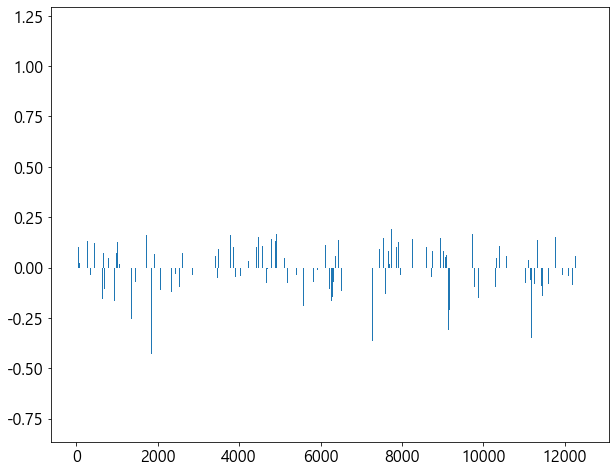

In [30]:

plt.figure(figsize=(10, 8))
plt.bar(range(len(lr2.coef_[0])), lr2.coef_[0])

In [31]:
print(sorted(((value, index) for index, value in enumerate(lr2.coef_[0])), reverse = True)[:5])
print(sorted(((value, index) for index, value in enumerate(lr2.coef_[0])), reverse = True)[-5:])

[(1.1957212399132502, 7340), (0.9598938902772465, 10930), (0.8740213409716105, 11864), (0.7119709071965905, 8662), (0.6561222613651241, 849)]
[(-0.6982980144862455, 2780), (-0.7139448922699219, 5220), (-0.7195494532159654, 5947), (-0.7465618507718728, 8637), (-0.7670894673275181, 1851)]


In [32]:
coef_pos_index = sorted(((value, index) for index, value in enumerate(lr2.coef_[0])), reverse = True)
coef_neg_index = sorted(((value, index) for index, value in enumerate(lr2.coef_[0])), reverse = False)
coef_pos_index

[(1.1957212399132502, 7340),
 (0.9598938902772465, 10930),
 (0.8740213409716105, 11864),
 (0.7119709071965905, 8662),
 (0.6561222613651241, 849),
 (0.6262620825580603, 11359),
 (0.5933607533355175, 9016),
 (0.5461172343862939, 6246),
 (0.5127972331563623, 10004),
 (0.5109612034979885, 2543),
 (0.5050838361004218, 3016),
 (0.49934027497451067, 2749),
 (0.4924687687045533, 3439),
 (0.48428334397430245, 10194),
 (0.4836963373171206, 10459),
 (0.4795968642414013, 8803),
 (0.4794192964336505, 3250),
 (0.46312866608088016, 6213),
 (0.4437835728365267, 3782),
 (0.4399465344886384, 3632),
 (0.4386057137735876, 823),
 (0.43573894866124546, 11640),
 (0.4261355394015875, 10078),
 (0.4233383516618468, 7629),
 (0.38937272467277956, 6978),
 (0.386535544736737, 4584),
 (0.3863762380218109, 1976),
 (0.3781955823916804, 3639),
 (0.37683024206808513, 1062),
 (0.3723178574110218, 7192),
 (0.37186524996571907, 4142),
 (0.3699982621078248, 11867),
 (0.367103750606874, 5577),
 (0.36627784533943514, 12006),


In [33]:
text_data_dict = {}

# 단어 사전에 있는 단어의 수만큼 반복한다.
for key in index_vectorizer.vocabulary_ :
    value = index_vectorizer.vocabulary_[key]
    # 위의 딕셔너리에 담는다.
    text_data_dict[value] = key
    
text_data_dict

{7340: 'night/NN',
 4795: 'got/VBD',
 3587: 'dusk/NN',
 11040: 'time/NN',
 11143: 'top/JJ',
 3001: 'dark/VBN',
 12291: 'would/MD',
 3607: 'earlier/JJR',
 4447: 'foothills/NNS',
 3874: 'etc/FW',
 1863: 'buses/NNS',
 12296: 'wouldnt/VBP',
 809: 'allow/IN',
 10495: 'stunning/JJ',
 6425: 'long/JJ',
 9783: 'since/IN',
 11781: 'visited/VBN',
 6989: 'mother/NN',
 2260: 'children/NNS',
 3898: 'even/RB',
 12033: 'weekend/NN',
 11793: 'visitors/NNS',
 6034: 'kosiguk/VBN',
 2717: 'cool/NN',
 12007: 'weather/RB',
 11332: 'trees/NNS',
 2707: 'convenient/VBP',
 11885: 'walking/NN',
 6978: 'morning/NN',
 3969: 'exercise/NN',
 1933: 'cafe/NN',
 10095: 'spacious/JJ',
 7725: 'outdoor/JJ',
 10089: 'space/NN',
 1924: 'cable/NN',
 2007: 'car/NN',
 3638: 'eat/NN',
 8334: 'pork/NN',
 2961: 'cutlet/NN',
 3005: 'date/NN',
 9104: 'riding/VBG',
 3453: 'doubledecker/NN',
 1851: 'bus/NN',
 4230: 'feels/VBZ',
 3250: 'different/JJ',
 1078: 'arrive/VB',
 6439: 'look/NN',
 1061: 'around/IN',
 9093: 'ride/VB',
 8678: '

In [34]:
# 긍정적인 어조 (상관계수가 1에 가장 큰)
top50 = coef_pos_index[:50]
# 부정적인 어조
bottom50 = coef_pos_index[-50:]

In [35]:
import nltk
from nltk.corpus import stopwords

In [36]:
pos=[]
for value, idx in top50 :
    if text_data_dict[idx].split('/')[0] not in stop_words:
        pos.append(text_data_dict[idx])
        print(text_data_dict[idx])

night/NN
things/NNS
walk/NN
quiet/JJ
amazing/JJ
trip/NN
restaurants/NNS
library/NN
sometimes/RB
comfortable/JJ
day/NN
corona/NN
dont/VBP
spring/NN
strolling/VBG
recommend/VB
different/JJ
leisure/NN
enjoyed/VBD
easy/JJ
along/IN
used/VBD
souvenirs/NNS
opening/NN
morning/NN
full/JJ
came/VBD
eat/VB
around/RB
namsan/RB
family/NN
walk/VB
incredible/JJ
weather/NN
photo/NN
may/MD
opportunity/NN
adults/NNS
rare/JJ
board/NN
pm/NN
accessible/JJ
explore/VB
nature/NN
highly/RB
walk/VBP
stores/NNS
lost/VBN
felt/VBD
mountains/NNS


In [37]:
neg=[]
for value, idx in bottom50 :
    if text_data_dict[idx].split('/')[0] not in stop_words:
        neg.append(text_data_dict[idx])
        print(text_data_dict[idx])

boring/NN
fewer/JJR
admission/NN
almost/RB
need/VBP
weekend/NN
normal/JJ
trap/NN
ive/JJ
ride/VBP
dissepoinding/VBG
dust/NN
every/DT
sadly/RB
cool/NN
namsangol/NN
emptu/NN
dep/NN
surrounding/VBG
long/RB
bus/JJ
waiting/VBG
long/JJ
top/JJ
nothing/NN
crowded/VBN
visited/VBN
rides/NNS
expectations/NNS
seemed/VBD
ride/NN
observatory/NN
base/NN
took/VBD
probably/RB
rest/VB
soso/JJ
much/JJ
due/JJ
money/NN
minutes/NNS
seems/VBZ
n/JJ
tourists/NNS
okay/NN
could/MD
hill/NN
kids/NNS
queue/NN
bus/NN


In [38]:
num_pos_rev=[]        
for i in pos:
    num_pos_rev.append(sum(df['리뷰 내용'].str.contains(i.split('/')[0])))

In [39]:
num_neg_rev=[]        
for i in neg:
    num_neg_rev.append(sum(df['리뷰 내용'].str.contains(i.split('/')[0])))

In [40]:
revword=pd.DataFrame([pos,num_pos_rev,neg,num_neg_rev],index=['긍정','리뷰 수','부정', '리뷰 수']).transpose()
revword

,긍정,리뷰 수,부정,리뷰 수
0,night/NN,1024,boring/NN,21
1,things/NNS,163,fewer/JJR,9
2,walk/NN,1379,admission/NN,39
3,quiet/JJ,81,almost/RB,68
4,amazing/JJ,290,need/VBP,243
5,trip/NN,271,weekend/NN,169
6,restaurants/NNS,404,normal/JJ,15
7,library/NN,26,trap/NN,37
8,sometimes/RB,20,ive/JJ,783
9,comfortable/JJ,46,ride/VBP,487


In [41]:
revword.to_csv("토픽4키워드감성분석.csv")